# Plotting Currents in Python

### Plotting one time-step

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import netcdf

In [2]:
fpath = '/gscratch/jisao/mclaret/GL64/'
gridU_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k1.nc','r')
gridV_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k1.nc','r')

In [3]:
# verify data shapes
coords = ['nav_lat', 'nav_lon']
for coord in coords:
    if gridU_k1.variables[coord].shape == gridV_k1.variables[coord].shape:
        print(coord, 'shapes match.')
    else:
        print(coord, 'shapes do not match.')

if gridU_k1.variables['vozocrtx'].shape == gridV_k1.variables['vomecrty'].shape:
    print('component shapes match.')
else:
    print('component shapes do not match.')

nav_lat shapes match.
nav_lon shapes match.
component shapes match.


In [4]:
# keep U variables
U_lat = gridU_k1.variables['nav_lat'][:][:].copy()        # latitude
U_lon = gridU_k1.variables['nav_lon'][:][:].copy()        # longitude
U_t0 = gridU_k1.variables['vozocrtx'][0][0][:][:].copy()  # first step of zonal velocity

# keep V variables
V_lat = gridV_k1.variables['nav_lat'][:][:].copy()        # latitude
V_lon = gridV_k1.variables['nav_lon'][:][:].copy()        # longitude
V_t0 = gridV_k1.variables['vomecrty'][0][0][:][:].copy()  # first step of meridional velocity

In [5]:
# currents
vel_t0 = 0.5 * (U_t0[:, :]**2 + V_t0[:, :]**2)

# set break intervals
breaks = np.linspace(0.0,0.15,40)
bticks = np.linspace(0.0,0.15,10)

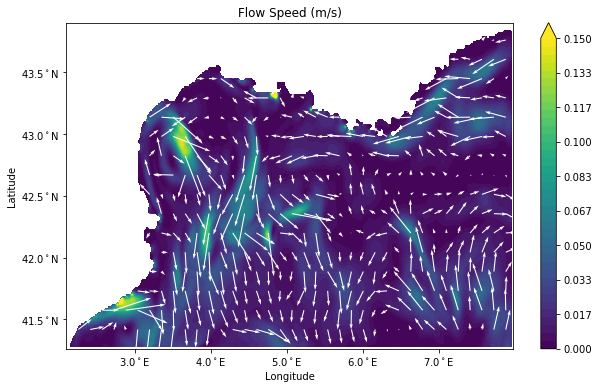

In [6]:
# set up plot
fig, ax = plt.subplots(figsize=(10,6))

# mask land with white (value = 0.0)
vel_t0 = np.ma.masked_where(vel_t0 == 0.0, vel_t0)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')
# Note: without this step, land gets masked by contour colors (values are near zero)

# plot contour map
vel_t0_map = plt.contourf(U_lon, U_lat, vel_t0, breaks, extend='max')

# draw every 10th vector
q = plt.quiver(U_lon[::10, ::10], U_lat[::10,::10], U_t0[::10,::10], V_t0[::10,::10], color='w')

# format lat/long labels
Elocs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in Elocs]
plt.xticks(Elocs[1:-1], Elabels[1:-1])
Nlocs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in Nlocs]
plt.yticks(Nlocs[1:-1], Nlabels[1:-1])

# figure labels
plt.colorbar(vel_t0_map, format='%.3f', ticks=bticks)
plt.title('Flow Speed (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Animating Currents

In [7]:
from matplotlib import animation as anm
from IPython.display import HTML

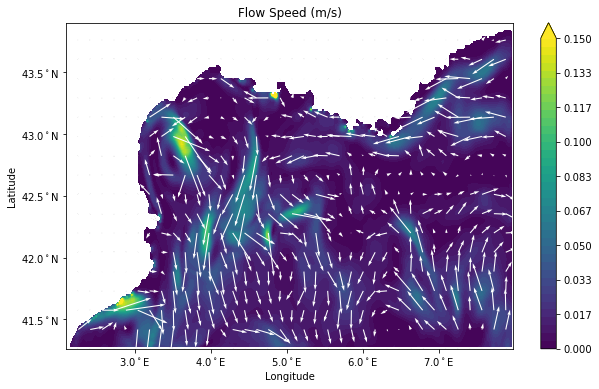

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

# currents
U = U_t0
V = V_t0
vel_t0 = 0.5 * (U_t0[:, :]**2 + V_t0[:, :]**2)

# mask land with white (value = 0.0)
vel_t0 = np.ma.masked_where(vel_t0 == 0.0, vel_t0)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')
# Note: without this step, land gets masked by contour colors (values are near zero)

# plot contour map
ax.contourf(U_lon, U_lat, vel_t0, breaks, extend='max')

# draw every 10th vector
ax.quiver(U_lon[::10, ::10], U_lat[::10,::10], U[::10,::10], V[::10,::10], color='k')

# format lat/long labels
Elocs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in Elocs]
plt.xticks(Elocs[1:-1], Elabels[1:-1])
Nlocs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in Nlocs]
plt.yticks(Nlocs[1:-1], Nlabels[1:-1])

# figure labels
ax.set_title('Flow Speed (m/s)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(vel_t0_map, format='%.3f', ticks=bticks)

def animate(i):
    # iterable function to be animated
    U = gridU_k1.variables['vozocrtx'][i][0][:][:].copy()  # zonal velocity
    V = gridV_k1.variables['vomecrty'][i][0][:][:].copy()  # meridional velocity
    vel = 0.5 * (U[:, :]**2 + V[:, :]**2)
    
    # mask land with white (value = 0.0)
    vel = np.ma.masked_where(vel == 0.0, vel)
    cmap = plt.cm.OrRd
    cmap.set_bad(color='w')
    
    # update contour plot
    ax.contourf(U_lon, U_lat, vel, breaks, extend='max')
    
    # update vectors
    ax.quiver(U_lon[::10, ::10], U_lat[::10,::10], U[::10,::10], V[::10,::10], color='w')
    

anim = anm.FuncAnimation(fig,animate, frames=20, interval=100)
HTML(anim.to_jshtml())